<a href="https://colab.research.google.com/github/uoahy-6uoas/HG-Machine/blob/main/hg3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**선형회귀**
> 선형회귀란? 변수들 간의 함수관계를 분석하는 방법 _medium_

In [11]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [16]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
train_input, test_input = train_input.reshape(-1,1), test_input.reshape(-1,1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
#길이 50에서 문제가 된다고 한다..
knr.predict([[50]]) #실제로 젠 50cm perch의 무게는 1500

array([1043.])

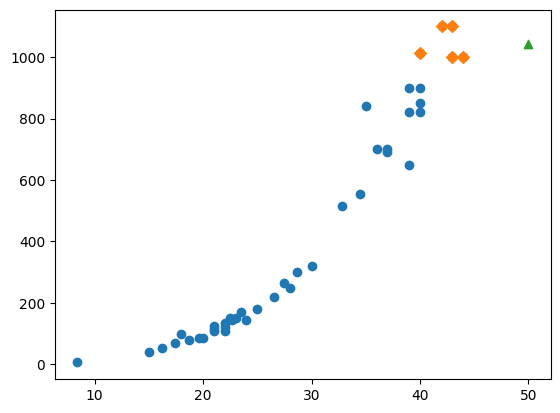

In [23]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D')
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.show()
#확실이 직관적인 값은 아니긴 하다

눈으로 보면 가상의 라인이 보이지만 knr로는 예측할 수 없다 --> 이런 류는 선형회귀 사용

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
lr.score(test_input,test_target)

0.8971725264252529

In [28]:
lr.predict([[50]])
#이제야 좀 1500에 비슷하다

array([1210.51780528])

In [29]:
#계수 저장된 곳
lr.coef_, lr.intercept_

(array([37.05401991]), -642.1831903549332)

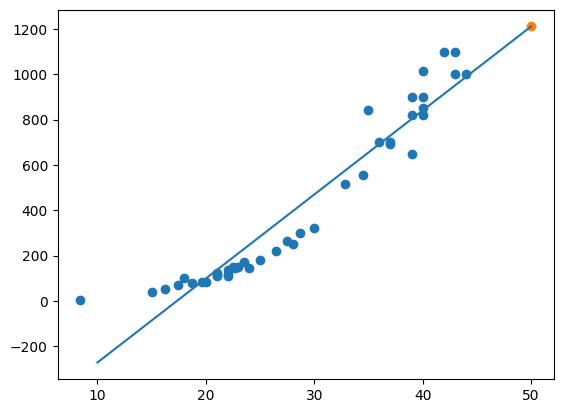

In [30]:
#show urself
plt.scatter(train_input,train_target)
plt.plot([10,50], [10*lr.coef_[0]+lr.intercept_,50*lr.coef_[0]+lr.intercept_])
plt.scatter(50, lr.predict([[50]]))
plt.show()

뭔가 train 셋 보면 2차함수 느낌나지 않음??

~~그래서 회귀했습니다.~~
**다항회귀**<br>

In [31]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
#shape은 (n,2)임

In [35]:
lr.fit(train_poly, train_target)
lr.predict([[50**2,50]])
#이제야 1500가깝게 나옴

array([1579.52233453])

In [36]:
print(lr.coef_, lr.intercept_)

[  1.03618336 -22.90953378] 134.54062627183936


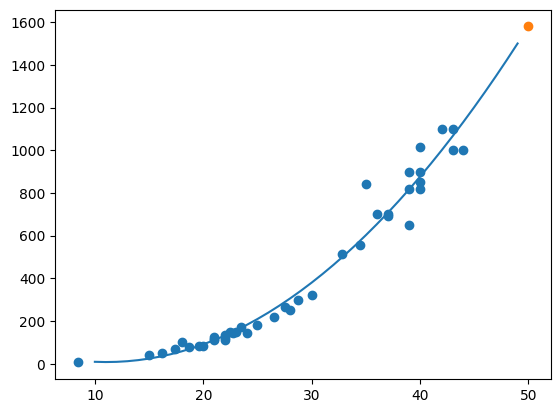

In [38]:
#2차함수 그리는 법
point = np.arange(10,50)
plt.scatter(train_input,train_target)
plt.plot(point, lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_)
plt.scatter(50,lr.predict([[50**2,50]]))
plt.show()

**확인문제**
1. 선형 회귀 모델이 찾은 방정식의 계수를 모델 파라미터라고 한다고 한다..
2. 사이킷런에서 다항 회귀 모델을 훈련할 수 있는 클래스는 LinarRegression이다.(학습 시킬 데이터만 적절히 변형시켜 주면 됨)